# **Grupo**

* Tathiana Martins - tsm2@cesar.school
* Bruno Santos - bfss@cesar.school
* Caio Guedes - ccsg@cesar.school
* Vandelson - vemf@cesar.school

# Regressão Linear

Base de dados utilizada:
1. Carregamento de dados
2. Análise dos dados
2. Remoção de campo desnecessário (b)
4. Tratamento de dados nulos e/ou faltantes
5. Separação dos dados, holdout
6. Normalização dos dados
7. Treinamento de modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

## Obtenha os dados
** Leia o arquivo csv 'BostonHousing.csv' em um DataFrame **

**Descrição dos dados**

O quadro de dados Boston tem 506 linhas e 14 colunas.

Este quadro de dados contém as seguintes colunas:

* crim: índice de criminalidade per capita por município.

* zn: proporção de terreno residencial zoneada para lotes acima de 25.000 pés quadrados.

* indus: proporção de hectares de negócios não varejistas por cidade.

* chas: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário).

* nox: concentração de óxidos de nitrogênio (partes por 10 milhões).

* rm: número médio de cômodos por domicílio.

* idade / age: proporção de unidades ocupadas pelo proprietário construídas antes de 1940.

* dis: média ponderada das distâncias para cinco centros de emprego de Boston.

* rad: índice de acessibilidade às rodovias radiais.

* imposto / tax: valor total do imposto predial por \$10.000.

* ptratio: relação aluno-professor por município.

* **preto / b**: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade.

* lstat: status inferior da população (porcentagem).

* medv: valor médio de residências ocupadas pelos proprietários em \$1000s. (**coluna target do nosso modelo**)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

Verifique o cabeçalho do DataFrame

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Vamos remover a coluna b porque não vamos utilizar essa informação na nossa modelagem.

In [ ]:
df.drop(columns=['b'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Estatística Descritiva

Dados faltantes

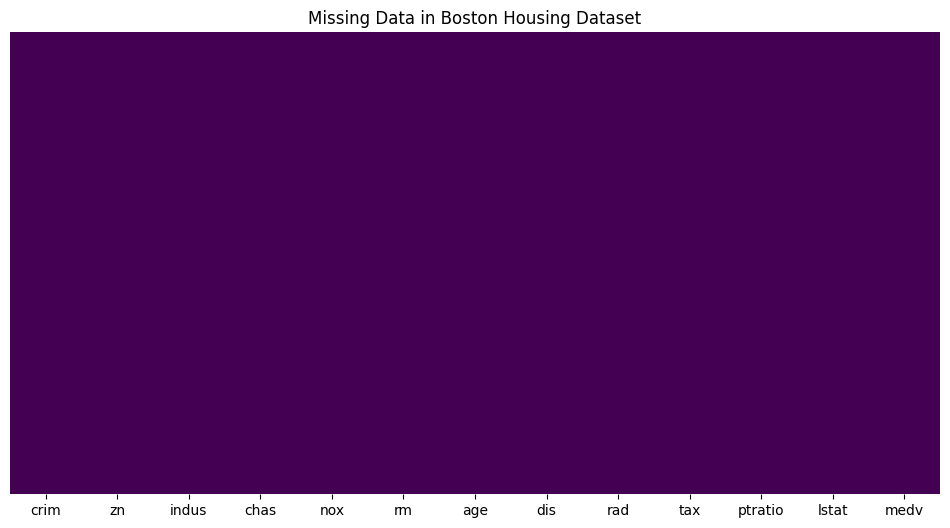

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Data in Boston Housing Dataset")
plt.show()

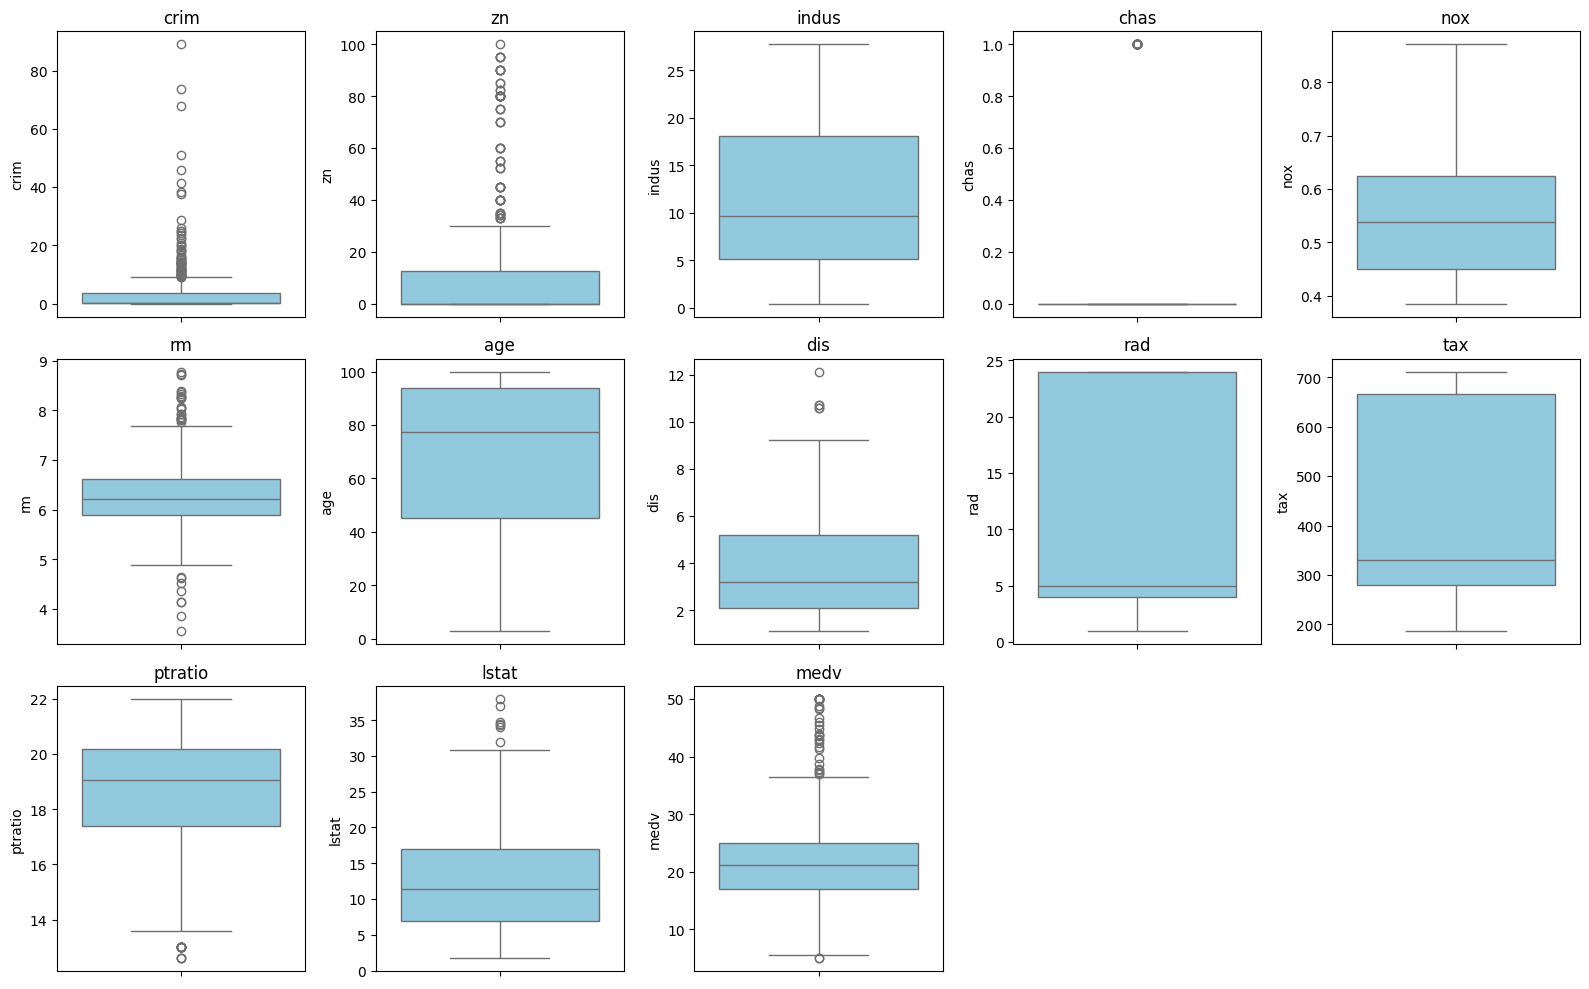

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.grid(False)
plt.tight_layout()
plt.show()


Podemos ver que existem muitos outliers em 8 colunas de 13 colunas no total. Isso pode ser um problema considerando que os alogritmos que usaremos neste notebook são muito sensíveis a anomalias.

## Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

A coluna target do nosso modelo é **medv**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['medv']),
                                                    df['medv'],
                                                    test_size=0.3,
                                                    random_state=111)

In [ ]:
pd.DataFrame(X_train).head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402,17.0,4.56
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,7.67
386,24.39380,0.0,18.10,0,0.700,4.652,100.0,1.4672,24,666,20.2,28.28
77,0.08707,0.0,12.83,0,0.437,6.140,45.8,4.0905,5,398,18.7,10.27
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,10.11


## Normalização dos dados

Vamos normalizar os dados.

Import StandardScaler do Scikit-learn.

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

Converta as variáveis independentes com o StandardScaler

In [ ]:
X_test_scaled = scaler.transform(X_test)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
X_train_scaled[:3]

array([[-0.44907456,  3.78381385, -1.43347391, -0.28154625, -1.33889353,
         1.02600682, -1.97141772,  1.85891086, -0.76927921, -0.07524679,
        -0.75662273, -1.19006285],
       [-0.43799762, -0.46194571, -0.40276632, -0.28154625, -0.31222266,
         0.73462462,  0.06573687, -0.42852307, -0.54062695, -0.18141874,
         1.10972235, -0.74008473],
       [ 2.80931263, -0.46194571,  0.98410962, -0.28154625,  1.26727098,
        -2.46306977,  1.10977861, -1.09077412,  1.63156951,  1.48194185,
         0.77473734,  2.24192461]])

Visualizando os dados de treinamento.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 199 to 340
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     354 non-null    float64
 1   zn       354 non-null    float64
 2   indus    354 non-null    float64
 3   chas     354 non-null    int64  
 4   nox      354 non-null    float64
 5   rm       354 non-null    float64
 6   age      354 non-null    float64
 7   dis      354 non-null    float64
 8   rad      354 non-null    int64  
 9   tax      354 non-null    int64  
 10  ptratio  354 non-null    float64
 11  lstat    354 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 36.0 KB


Visualizando os dados de teste.

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 93 to 158
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     152 non-null    float64
 1   zn       152 non-null    float64
 2   indus    152 non-null    float64
 3   chas     152 non-null    int64  
 4   nox      152 non-null    float64
 5   rm       152 non-null    float64
 6   age      152 non-null    float64
 7   dis      152 non-null    float64
 8   rad      152 non-null    int64  
 9   tax      152 non-null    int64  
 10  ptratio  152 non-null    float64
 11  lstat    152 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 15.4 KB


## Regressão Linear

In [ ]:
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)

y_pred = reg.predict(X_test_scaled)

**Executar o modelo treinado na base de treinamento**

In [ ]:
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

Analisando o score de treino e teste.

In [ ]:
score_train = reg.score(X_train_scaled, y_train)
score_train

0.7381975510401046

In [ ]:
score_test = reg.score(X_test_scaled, y_test)
score_test

0.711547915567693

**Avaliação de Regressores - Exibir os Resultados**

In [ ]:
def print_metrics(y_test_in, y_test_pred_in):
  print("MEAN: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", mean_squared_error(y_test_in, y_test_pred_in)**2)
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

In [ ]:
# dados de treino
print_metrics(y_train, y_train_pred)

MEAN:  3.1835585717761252
MAPE:  0.16078737073033178
MSE:  20.374619886830068
RMSE:  415.12513553281127
R²:  0.7381975510401046


In [ ]:
# dados de teste
print_metrics(y_test, y_test_pred)

MEAN:  3.701488287606292
MAPE:  0.17831885665559696
MSE:  28.607656840343854
RMSE:  818.3980298948725
R²:  0.711547915567693


## k-NN Regressão

In [ ]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_scaled, y_train)
model.best_params_

{'n_neighbors': 6}

**Executar o modelo treinado na base de treinamento**

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3)

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_train_pred_knn_3 = knn.predict(X_train_scaled) # Linha nova
y_pred_knn_3 = knn.predict(X_test_scaled)

In [ ]:
# score dos dados de treino
knn.score(X_train_scaled, y_train)

0.8670591164466853

In [ ]:
# score dos dados de teste.
knn.score(X_test_scaled, y_test)

0.7597083113180875

**Avaliar o melhor valor de K**

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29


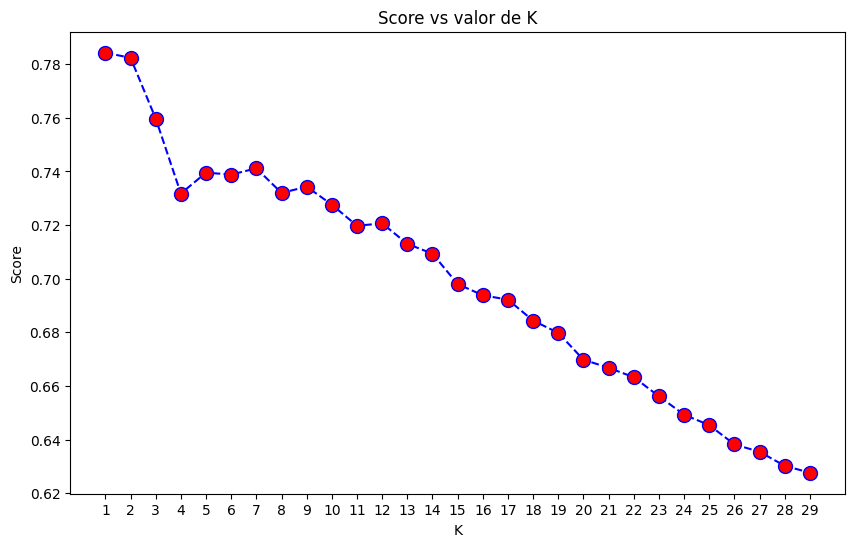

In [ ]:
score = []

for i in range(1,30):
  ## treine o modelo
  knn_plot = neighbors.KNeighborsRegressor(n_neighbors=i) # Initialize the model within the loop
  knn_plot.fit(X_train_scaled, y_train) # Use knn_plot to fit the model
  ## calcule as métricas
  s = knn_plot.score(X_test_scaled, y_test) # Use knn_plot to calculate the score
  ## armazene na lista score
  score.append(s)
  print("k=", i)

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)

plt.xticks(range(1, 30, 1))
plt.title('Score vs valor de K')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

### Criar um regressor com o melhor valor para o melhor K e avaliar





##K = 3

In [ ]:
## com o melhor valor de k
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))

0.8670591164466853
0.7597083113180875


##K = 2

In [ ]:
knn_2 = neighbors.KNeighborsRegressor(n_neighbors = 2)
knn_2.fit(X_train_scaled, y_train)
y_train_pred_knn_2 = knn_2.predict(X_train_scaled) # Linha nova
y_pred_knn_2 = knn_2.predict(X_test_scaled)
print(knn_2.score(X_train_scaled, y_train))
print(knn_2.score(X_test_scaled, y_test))

0.9168829094974466
0.7823765354304283


##K = 1

In [ ]:
#y_train_pred = reg.predict(X_train_scaled)
#y_test_pred = reg.predict(X_test_scaled)

In [ ]:
knn_1 = neighbors.KNeighborsRegressor(n_neighbors = 1)
knn_1.fit(X_train_scaled, y_train)
y_train_pred_knn_1 = knn_1.predict(X_train_scaled) # Linha nova
y_pred_knn_1 = knn_1.predict(X_test_scaled)
print(knn_1.score(X_train_scaled, y_train))
print(knn_1.score(X_test_scaled, y_test))

1.0
0.7842753969841532


**Avaliação de Regressores - k-NN**

In [ ]:
# K=1
print("Dados de treino")
print_metrics(y_train, y_train_pred_knn_1)

Dados de treino
MEAN:  0.0
MAPE:  0.0
MSE:  0.0
RMSE:  0.0
R²:  1.0


In [ ]:
# K=2
print("Dados de treino")
print_metrics(y_train, y_train_pred_knn_2)

Dados de treino
MEAN:  1.566242937853107
MAPE:  0.07588468902484789
MSE:  6.468538135593221
RMSE:  41.84198561162382
R²:  0.9168829094974466


In [ ]:
# K=3
print("Dados de treino")
print_metrics(y_train, y_train_pred_knn_3)

Dados de treino
MEAN:  1.9395480225988702
MAPE:  0.09057840985071576
MSE:  10.346045197740112
RMSE:  107.04065123368125
R²:  0.8670591164466853


**Com dados de teste**

In [ ]:
# K=1
print("Dados de teste")
print_metrics(y_test, y_pred_knn_1)

Dados de teste
MEAN:  3.132236842105263
MAPE:  0.15442199439994692
MSE:  21.394802631578948
RMSE:  457.7375796442175
R²:  0.7842753969841532


In [ ]:
# K=2
print("Dados de teste")
print_metrics(y_test, y_pred_knn_2)

Dados de teste
MEAN:  2.958552631578948
MAPE:  0.14024710040182514
MSE:  21.583125000000003
RMSE:  465.8312847656251
R²:  0.7823765354304283


In [ ]:
# K=3
print("Dados de teste")
print_metrics(y_test, y_pred_knn_3)

Dados de teste
MEAN:  3.0506578947368426
MAPE:  0.14024661347440281
MSE:  23.83127923976608
RMSE:  567.9298702037057
R²:  0.7597083113180875


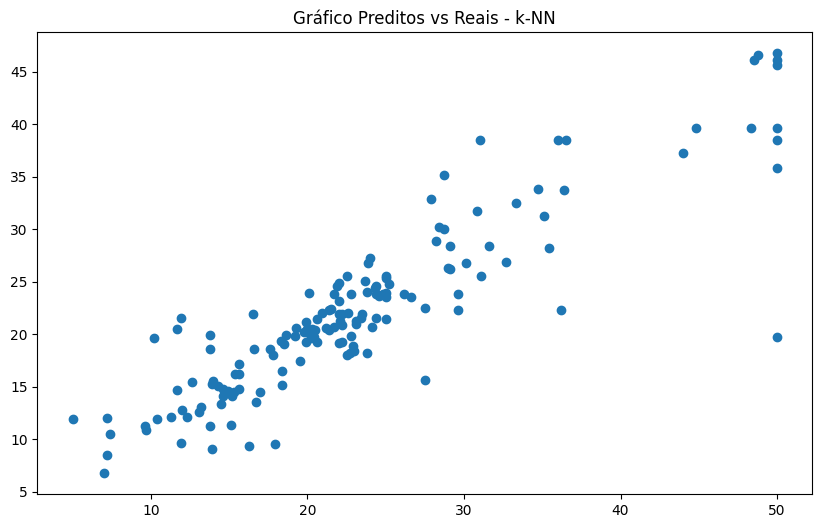

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - k-NN')
plt.scatter(y_test, y_pred_knn_2)
plt.show()

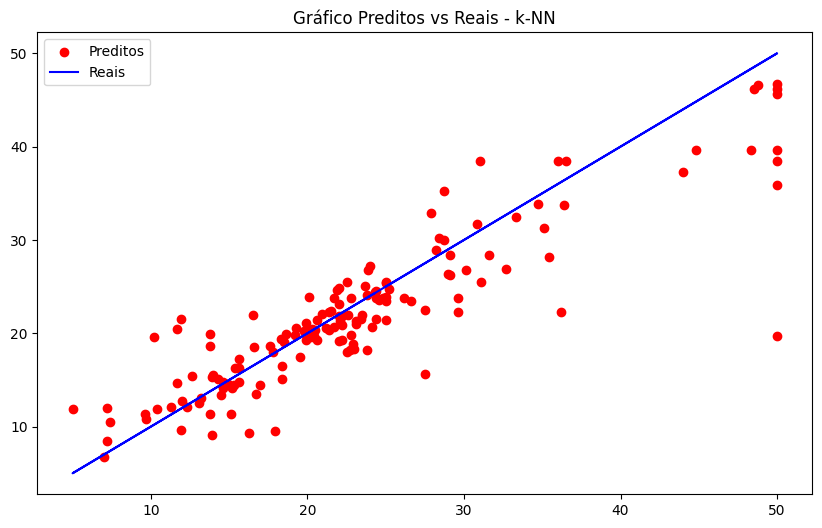

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - k-NN')

# Plotando os valores reais no eixo X e os preditos no eixo Y
plt.scatter(y_test, y_pred_knn_2, color='red', label='Preditos')

# Plotando uma linha de referência (diagonal) para visualizar onde os preditos deveriam estar se fossem perfeitos
plt.plot(y_test, y_test, color='blue', label='Reais')

# Adicionando uma legenda para diferenciar os dois conjuntos de dados
plt.legend()

# Exibindo o gráfico
plt.show()


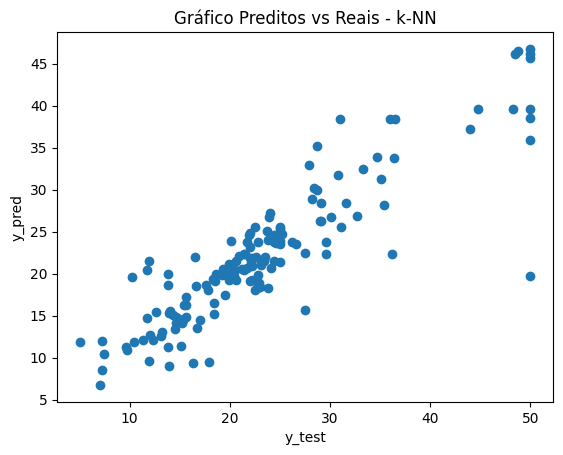

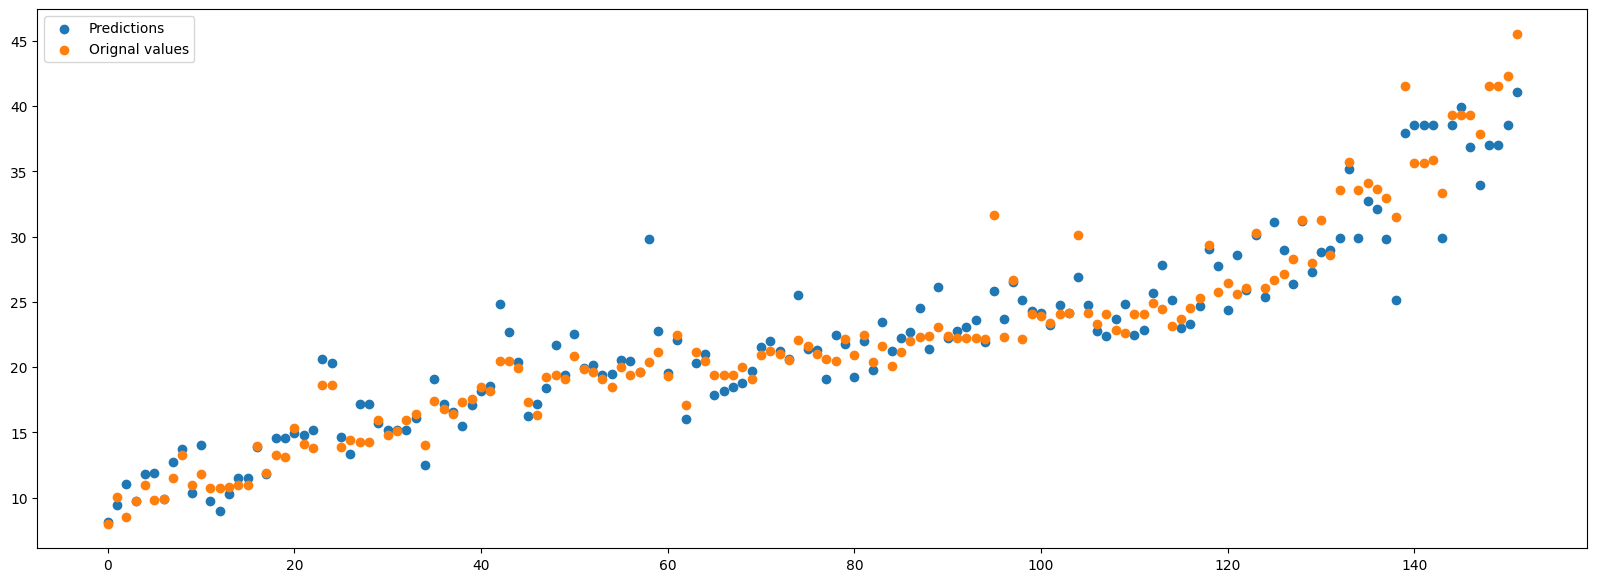

In [ ]:
# Dispersão de y_test vs y_pred
plt.scatter(y_test, y_pred_knn_2)
plt.title('Gráfico Preditos vs Reais - k-NN')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Dispersão de pred vs. y
plt.figure(figsize=(20, 7))
idx = np.argsort(y_pred_knn_2)
preds = model.predict(X_test_scaled)
plt.scatter(range(len(y_pred_knn_3)), preds[idx] , label= "Predictions")
plt.scatter(range(len(y_test)), y_pred_knn_3[idx], label="Orignal values")
plt.legend()

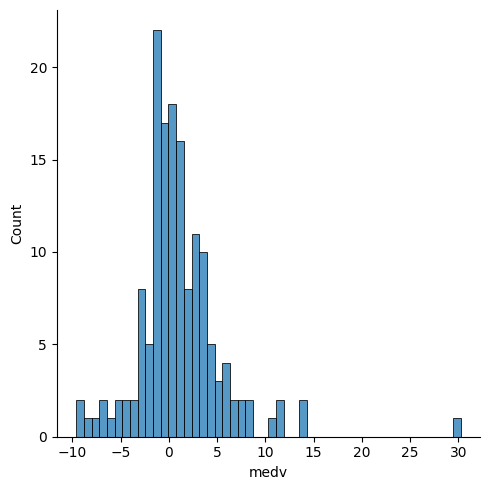

In [ ]:
# Distribuição do erro
sns.displot((y_test-y_pred_knn_2), bins=50)

## Treinar o modelo de Regressão Polinomial, n=1, n=5, n=10

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Com os dados normalizados, aplicar a transformação polinomial de graus 1, 5, 10 e 15

Grau 1

In [ ]:
poly_grau_1 = PolynomialFeatures(degree=1)
X_train_scaled_poly_1 = poly_grau_1.fit_transform(X_train_scaled)
X_test_scaled_poly_1 = poly_grau_1.transform(X_test_scaled)

Grau 2

In [ ]:
poly_grau_2 = PolynomialFeatures(degree=2)
X_train_scaled_poly_2 = poly_grau_2.fit_transform(X_train_scaled)
X_test_scaled_poly_2 = poly_grau_2.transform(X_test_scaled)

Grau 5

In [ ]:
poly_grau_5 = PolynomialFeatures(degree=5)
X_train_scaled_poly_5 = poly_grau_5.fit_transform(X_train_scaled)
X_test_scaled_poly_5 = poly_grau_5.transform(X_test_scaled)

Grau 10

In [ ]:
poly_grau_10 = PolynomialFeatures(degree=10)
X_train_scaled_poly_10 = poly_grau_10.fit_transform(X_train_scaled)
X_test_scaled_poly_10 = poly_grau_10.transform(X_test_scaled)

### **Treinar o modelo de regressão linear para verificar o melhor resultado da transformação polinomial**

Grau 1

In [ ]:
## treine o modelo
poly_reg_grau_1 = LinearRegression(copy_X=True)
poly_reg_grau_1.fit(X_train_scaled_poly_1, y_train)
y_pred_grau_1 = poly_reg_grau_1.predict(X_train_scaled_poly_1)

In [ ]:
## analise as métricas
print_metrics(y_train, y_pred_grau_1)

MEAN:  3.1835585717761252
MAPE:  0.16078737073033175
MSE:  20.374619886830068
RMSE:  415.12513553281127
R²:  0.7381975510401046


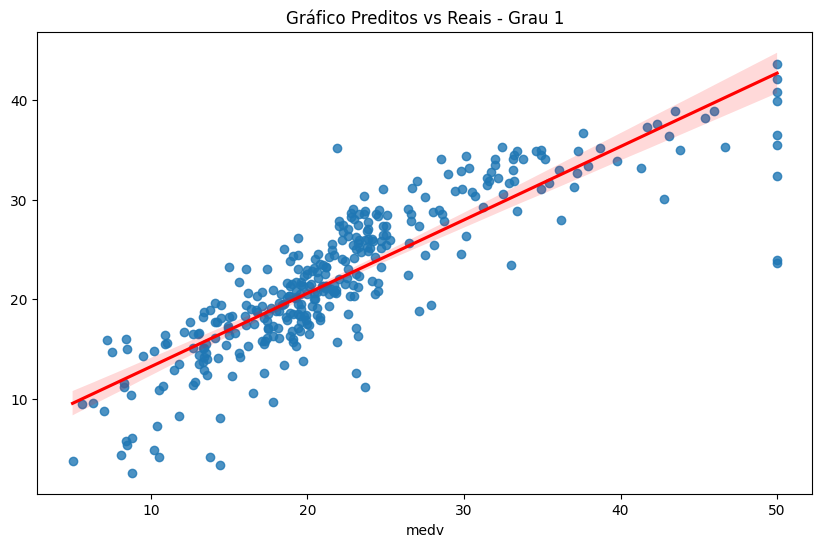

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Grau 1')
sns.regplot(x=y_train,y=y_pred_grau_1,line_kws={"color": "red"})
plt.show()

Grau 2

In [ ]:
## treine o modelo
poly_reg_grau_2 = LinearRegression(copy_X=True)
poly_reg_grau_2.fit(X_train_scaled_poly_2, y_train)
y_pred_grau_2 = poly_reg_grau_2.predict(X_train_scaled_poly_2)

In [ ]:
## analise as métricas
print_metrics(y_train, y_pred_grau_2)

MEAN:  5.22607697740113
MAPE:  0.25804741173702167
MSE:  49.19427684719279
RMSE:  2420.0768745182486
R²:  0.36788110772407034


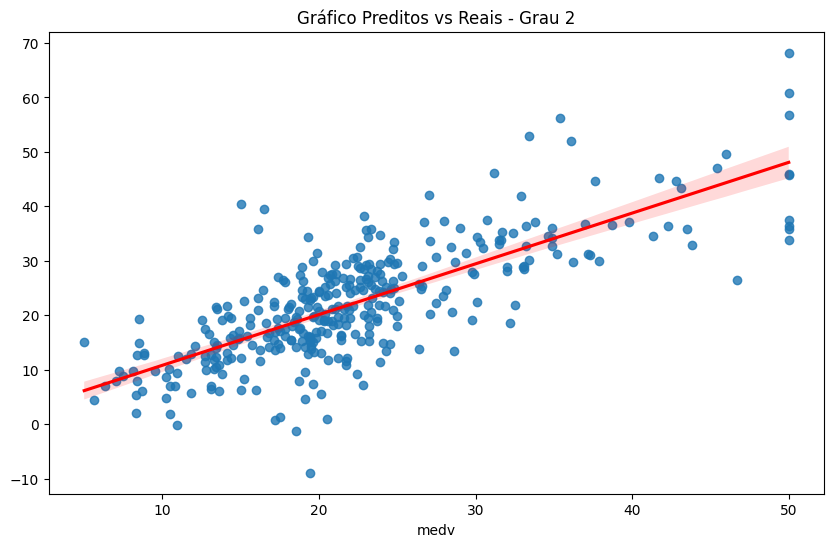

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Grau 2')
sns.regplot(x=y_train,y=y_pred_grau_2,line_kws={"color": "red"})
plt.show()

Grau 5

In [ ]:
## treine o modelo
poly_reg_grau_5 = LinearRegression(copy_X=True)
poly_reg_grau_5.fit(X_train_scaled_poly_5, y_train)
y_pred_grau_5 = poly_reg_grau_5.predict(X_train_scaled_poly_5)

In [ ]:
## analise as métricas
print_metrics(y_train, y_pred_grau_5)

MEAN:  1.99818065420965e-12
MAPE:  1.0209140247716293e-13
MSE:  7.101494448820678e-24
RMSE:  5.04312234066309e-47
R²:  1.0


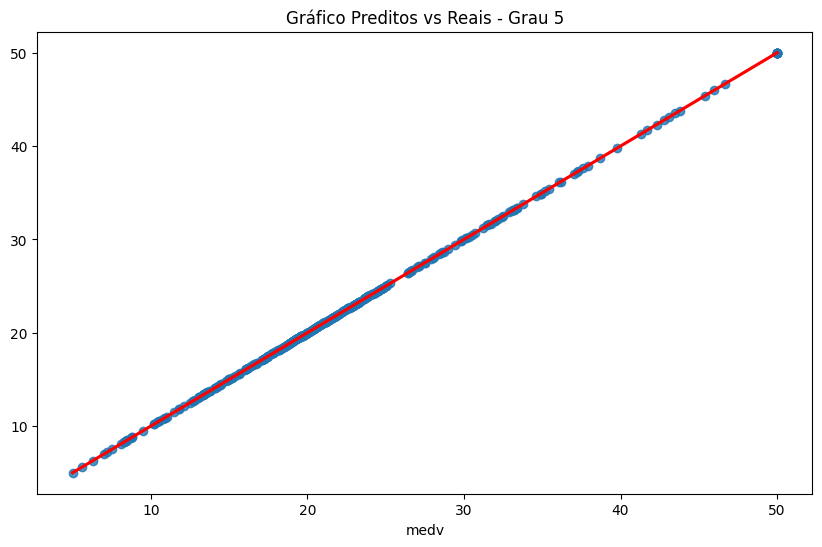

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Grau 5')
sns.regplot(x=y_train,y=y_pred_grau_5,line_kws={"color": "red"})
plt.show()

Grau 10

In [ ]:
## treine o modelo - vai demorar um pouco..
poly_reg_grau_10 = LinearRegression(copy_X=True)
poly_reg_grau_10.fit(X_train_scaled_poly_10, y_train)
y_pred_grau_10 = poly_reg_grau_10.predict(X_train_scaled_poly_10)

In [ ]:
## analise as métricas
print_metrics(y_train, y_pred_grau_10)

MEAN:  8.529238934714821e-10
MAPE:  6.161274742594629e-11
MSE:  2.3807637606272074e-17
RMSE:  5.668036083915803e-34
R²:  1.0


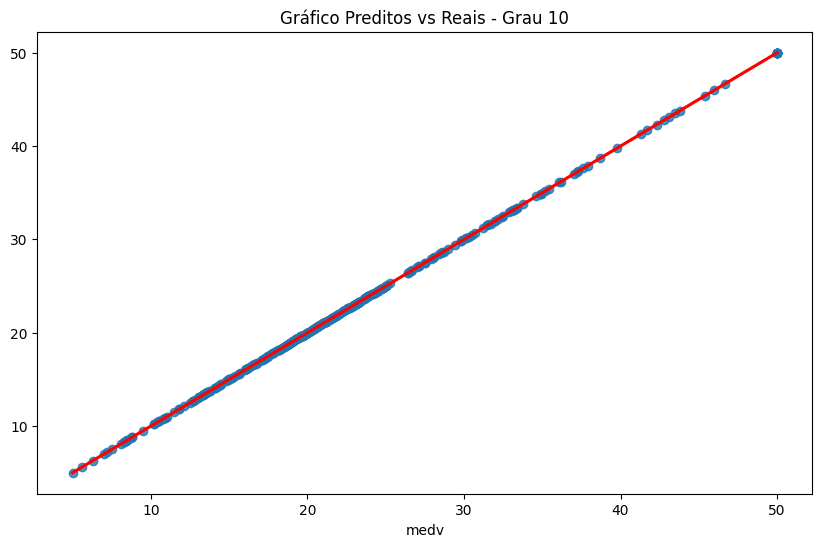

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Grau 10')
sns.regplot(x=y_train,y=y_pred_grau_10,line_kws={"color": "red"})
plt.show()

### Usando K-NN Regression

Grau 1

In [ ]:
knn_poly_1 = neighbors.KNeighborsRegressor(n_neighbors = 2)
knn_poly_1.fit(X_train_scaled_poly_1, y_train)
y_train_pred_knn_poly_1 = knn_poly_1.predict(X_train_scaled_poly_1)
y_pred_knn_poly_1 = knn_poly_1.predict(X_test_scaled_poly_1)
print(knn_poly_1.score(X_train_scaled_poly_1, y_train))
print(knn_poly_1.score(X_test_scaled_poly_1, y_test))

0.9168829094974466
0.7823765354304283


In [ ]:
## analise as métricas (Treino)
print_metrics(y_train, y_train_pred_knn_poly_1)

MEAN:  1.566242937853107
MAPE:  0.07588468902484789
MSE:  6.468538135593221
RMSE:  41.84198561162382
R²:  0.9168829094974466


In [ ]:
## analise as métricas (Teste)
print_metrics(y_test, y_pred_knn_poly_1)

MEAN:  2.958552631578948
MAPE:  0.14024710040182514
MSE:  21.583125000000003
RMSE:  465.8312847656251
R²:  0.7823765354304283


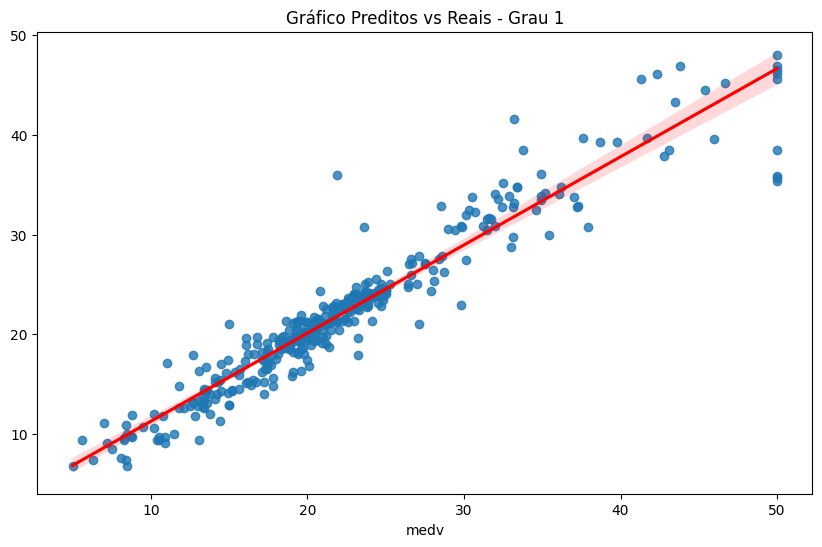

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Grau 1 (Treino)')
sns.regplot(x=y_train,y=y_train_pred_knn_poly_1,line_kws={"color": "red"})
plt.show()

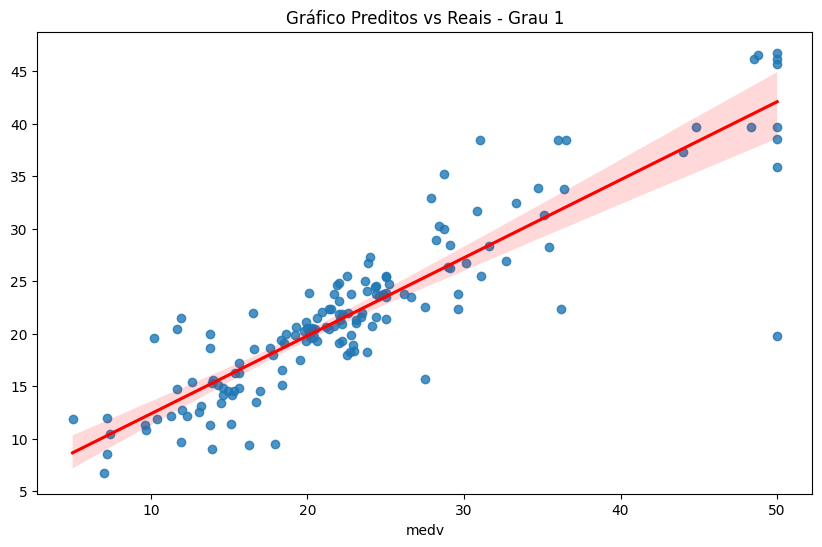

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Grau 1 (Teste)')
sns.regplot(x=y_test,y=y_pred_knn_poly_1,line_kws={"color": "red"})
plt.show()

Grau 2

In [ ]:
knn_poly_2 = neighbors.KNeighborsRegressor(n_neighbors = 2)
knn_poly_2.fit(X_train_scaled_poly_2, y_train)
y_train_pred_knn_poly_2 = knn_poly_2.predict(X_train_scaled_poly_2) # Linha nova
y_pred_knn_poly_2 = knn_poly_2.predict(X_test_scaled_poly_2)
print(knn_poly_2.score(X_train_scaled_poly_2, y_train))
print(knn_poly_2.score(X_test_scaled_poly_2, y_test))

0.9133775351692683
0.7781123059866794


In [ ]:
## analise as métricas (Treino)
print_metrics(y_train, y_train_pred_knn_poly_2)

MEAN:  1.597175141242938
MAPE:  0.0772252683956547
MSE:  6.741341807909605
RMSE:  45.445689371069946
R²:  0.9133775351692683


In [ ]:
## analise as métricas (Teste)
print_metrics(y_test, y_pred_knn_poly_2)

MEAN:  3.024013157894737
MAPE:  0.14364361269590697
MSE:  22.006036184210522
RMSE:  484.2656285407828
R²:  0.7781123059866794


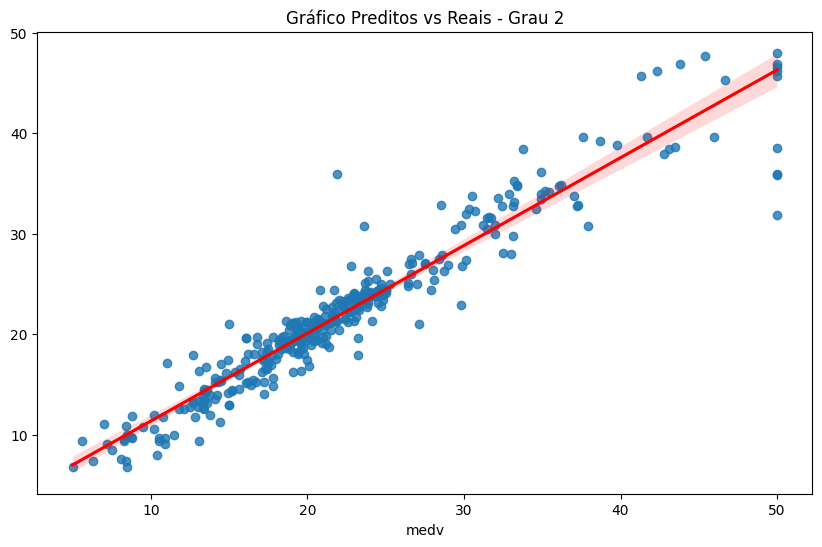

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Grau 2 (Treino)')
sns.regplot(x=y_train,y=y_train_pred_knn_poly_2,line_kws={"color": "red"})
plt.show()

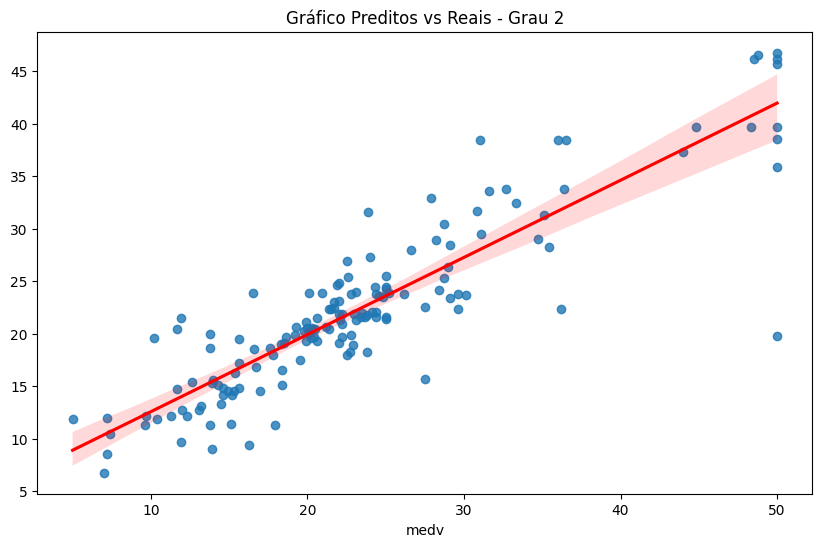

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Gráfico Preditos vs Reais - Grau 2 (Teste)')
sns.regplot(x=y_test,y=y_pred_knn_poly_2,line_kws={"color": "red"})
plt.show()

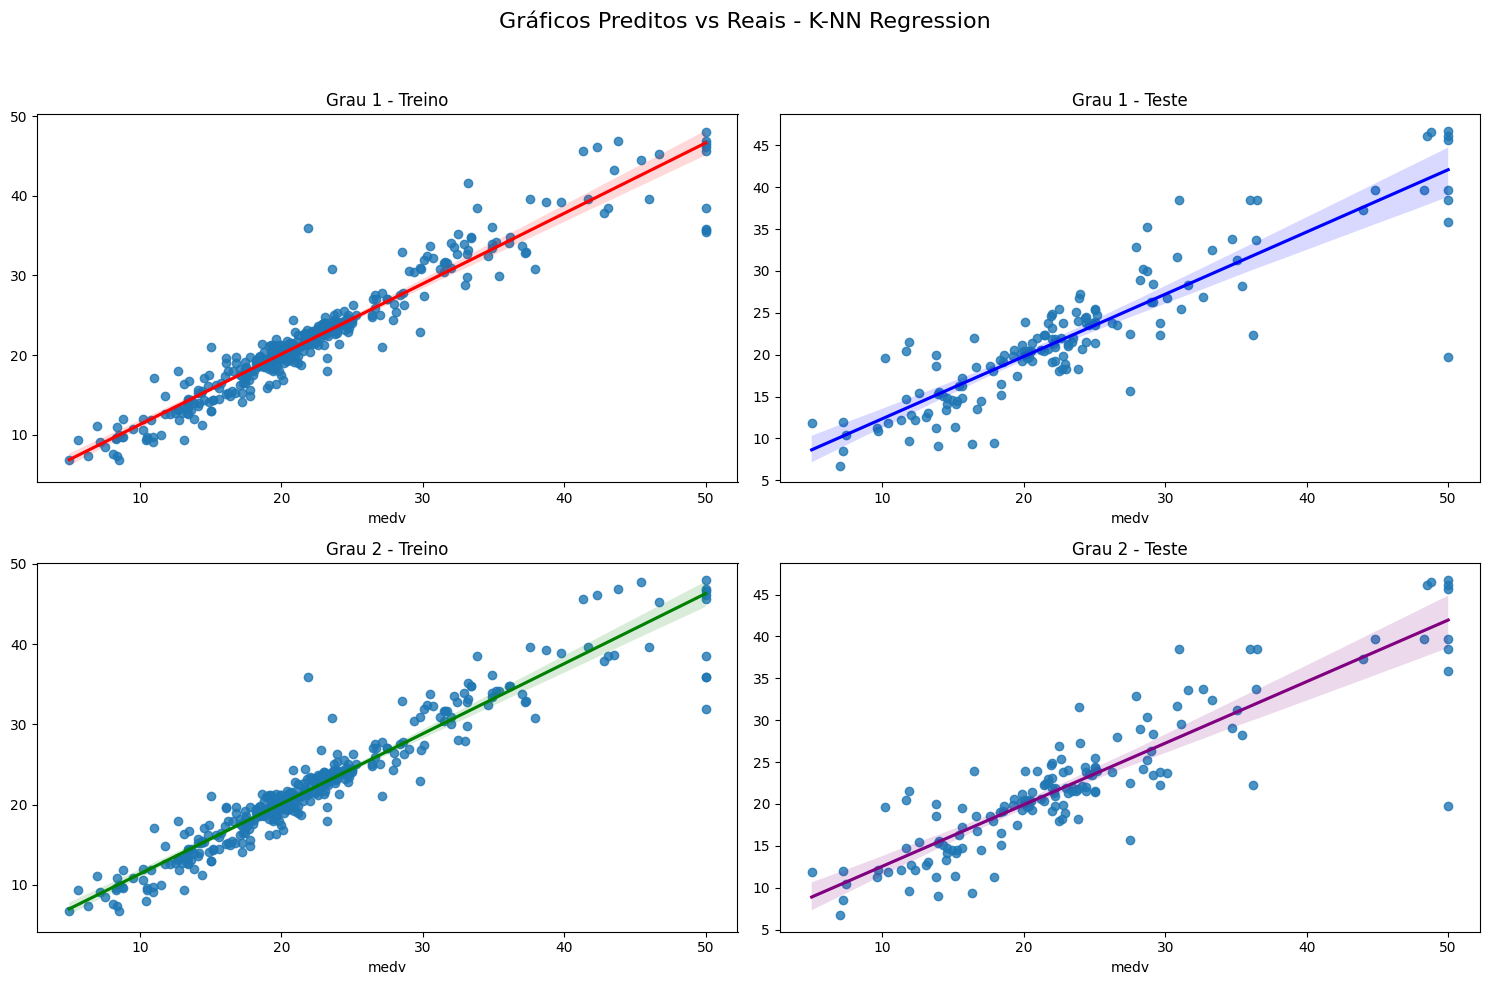

In [ ]:
# Configurando o grid com 2 linhas e 2 colunas de gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Ajuste do título principal
fig.suptitle('Gráficos Preditos vs Reais - K-NN Regression', fontsize=16)

# Gráfico 1
sns.regplot(x=y_train, y=y_train_pred_knn_poly_1, line_kws={"color": "red"}, ax=axes[0, 0])
axes[0, 0].set_title('Grau 1 - Treino')

# Gráfico 2
sns.regplot(x=y_test, y=y_pred_knn_poly_1, line_kws={"color": "blue"}, ax=axes[0, 1])
axes[0, 1].set_title('Grau 1 - Teste')

# Gráfico 3
sns.regplot(x=y_train, y=y_train_pred_knn_poly_2, line_kws={"color": "green"}, ax=axes[1, 0])
axes[1, 0].set_title('Grau 2 - Treino')

# Gráfico 4
sns.regplot(x=y_test, y=y_pred_knn_poly_2, line_kws={"color": "purple"}, ax=axes[1, 1])
axes[1, 1].set_title('Grau 2 - Teste')

# Ajuste dos espaços entre os subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Exibindo o gráfico
plt.show()


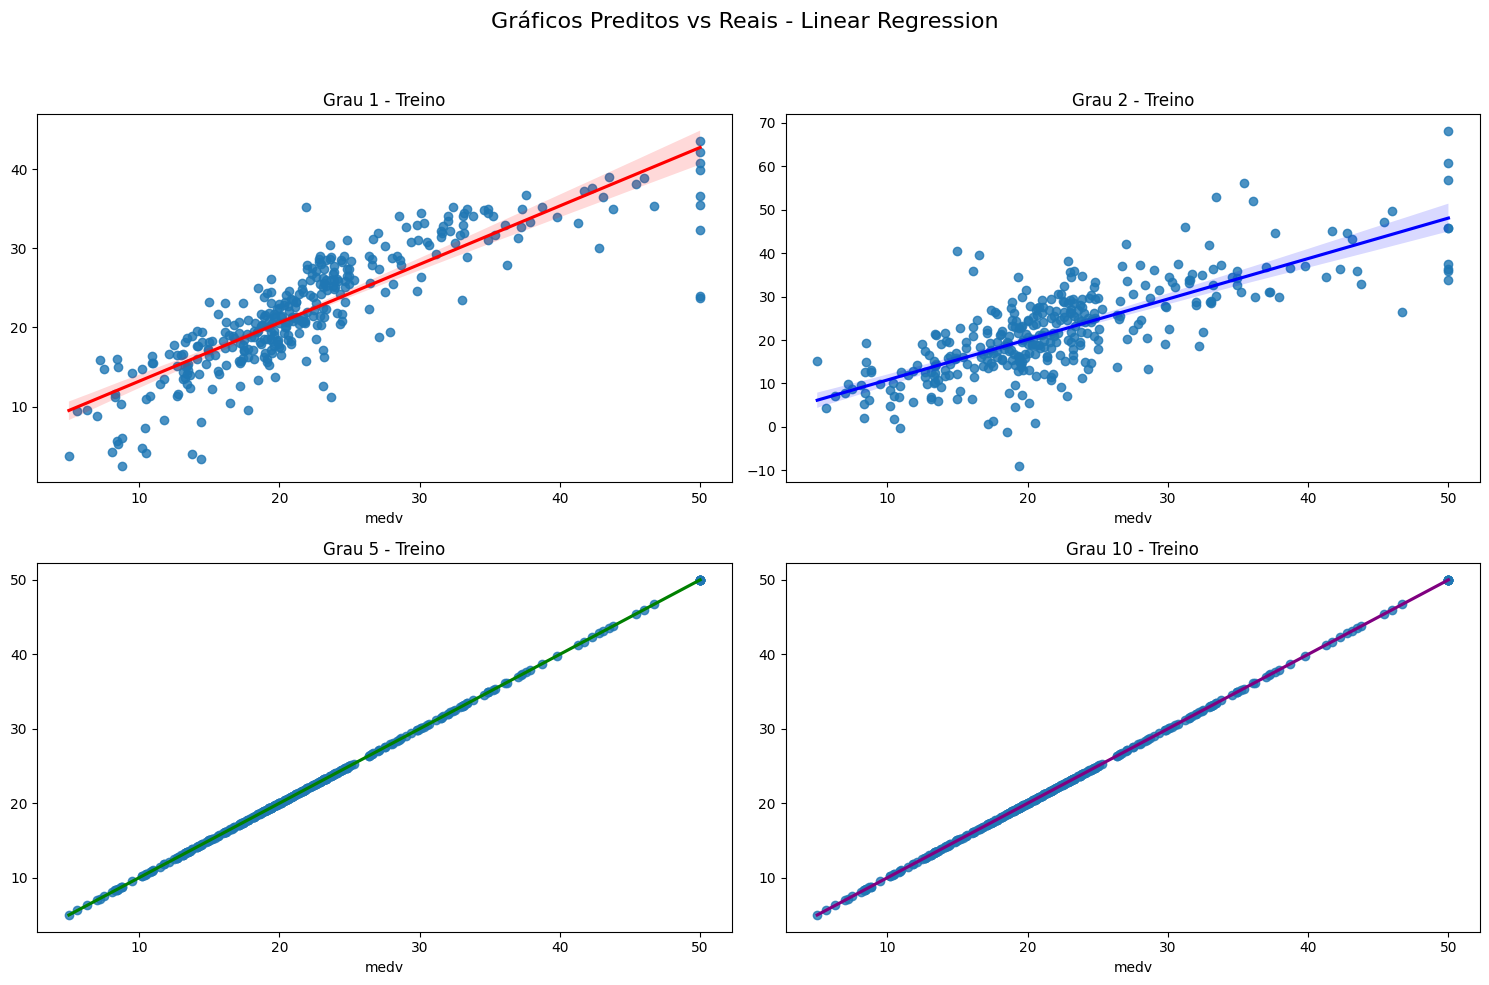

In [ ]:
# Configurando o grid com 2 linhas e 2 colunas de gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Ajuste do título principal
fig.suptitle('Gráficos Preditos vs Reais - Linear Regression', fontsize=16)

# Gráfico 1
sns.regplot(x=y_train, y=y_pred_grau_1, line_kws={"color": "red"}, ax=axes[0, 0])
axes[0, 0].set_title('Grau 1 - Treino')

# Gráfico 2
sns.regplot(x=y_train, y=y_pred_grau_2, line_kws={"color": "blue"}, ax=axes[0, 1])
axes[0, 1].set_title('Grau 2 - Treino')

# Gráfico 3
sns.regplot(x=y_train, y=y_pred_grau_5, line_kws={"color": "green"}, ax=axes[1, 0])
axes[1, 0].set_title('Grau 5 - Treino')

# Gráfico 4
sns.regplot(x=y_train, y=y_pred_grau_10, line_kws={"color": "purple"}, ax=axes[1, 1])
axes[1, 1].set_title('Grau 10 - Treino')

# Ajuste dos espaços entre os subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Exibindo o gráfico
plt.show()


O modelo K-NN Regression com grau 2 parece ser a melhor escolha. Se as métricas de desempenho (como RMSE, MAE, etc.) são semelhantes entre o modelo polinomial de grau 1 e o de grau 2, geralmente é mais prudente escolher o modelo de grau 1, devido à sua simplicidade, menor risco de overfitting, e melhor interpretabilidade. Porém, os ruídos gerados pelo modelo com grau 2 não possui nenhum sinal de overfitting, ele parece ter um bom equilíbrio entre assertividade e generalização.








## Conclusão

Primeiro normalizamos os dados usando o StandardScaler do Scikit-Learn, em seguida aplicamos o algoritmo de Regressão Linear e K-NN Regression com resultados razoáveis. K-NN Regression - 86% para dados de treino e 75% com dados de teste (K = 2). Enquanto que o Linear Regression ficou com R² de 73% usando dados de treino e 71% usando dados de teste.

Também aplicamos o método polinomial de grau 1, 2, 5 e 10 nos dados e em seguida treinamos os dois modelos LR e K-NN Reg com os dados transformados e encontramos um desempenho ainda melhor, demonstrando que a transformação polinomial conseguiu representar e reproduzir corretamente o padrão dos dados, ajudando os modelos a encontrar estes padrões.